# Predicting Fraud in the ENRON Dataset

In [1]:
## Given:

In [ ]:
## The dataset

In [804]:
%pylab inline
import pickle 
import pandas as pd
import numpy as np

import matplotlib as pl
import seaborn as sns
import pprint as pprint

import IPython.display
IPython.display.display_html

Populating the interactive namespace from numpy and matplotlib


<function IPython.core.display.display_html>

In [805]:
dataPath = "/Users/karansagoo/PycharmProjects/Resume/Enron_Report/data/final_project_dataset.pkl"
with open (dataPath, "r") as f:
    dataDict = pickle.load(f)

In [806]:
## CHECKING STRUCUTRE OF DICT 

i = 0
for k,v in dataDict.iteritems():
    if i < 3:
        print k,v
    i+=1

METTS MARK {'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38}
BAXTER JOHN C {'salary': 267102, 'to_messages': 'NaN', 'deferral_payments': 1295738, 'total_payments': 5634343, 'exercised_stock_options': 6680544, 'bonus': 1200000, 'restricted_stock': 3942714, 'shared_receipt_with_poi': 'NaN', 'restricted_stock_deferred': 'NaN', 'total_stock_value': 10623258, 'expenses': 11200, 'loan_advances': 'NaN', 'from_messages': 'NaN', 'other': 2660303, 'from_this_person_to_poi': 'NaN', 'poi': False, 'director_fees'

In [807]:
## Converting dictionary to pandas Dataframe

# help(pd.DataFrame.from_dict)
# help (pd.concat)

name = [] #name of the person which is the key
frame = [] # used for appending data (features) of each key (name eg. "METTS MARK" )
for k,v in dataDict.iteritems():
    name.append(k)
    df = pd.DataFrame.from_dict(v, orient = 'index').transpose()
    df["name"] = k
    frame.append(df)

df = pd.concat(frame)

df.reset_index(drop = True, inplace = True);

In [808]:
## Checking the Structure of Converted Dataframe from dict
display (df.head(2))
display (df.info())

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person,name
0,365788,807,NaN,1061827,NaN,600000,585062,702,NaN,585062,...,29,1740,1,False,NaN,NaN,NaN,mark.metts@enron.com,38,METTS MARK
1,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN,BAXTER JOHN C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
salary                       146 non-null object
to_messages                  146 non-null object
deferral_payments            146 non-null object
total_payments               146 non-null object
exercised_stock_options      146 non-null object
bonus                        146 non-null object
restricted_stock             146 non-null object
shared_receipt_with_poi      146 non-null object
restricted_stock_deferred    146 non-null object
total_stock_value            146 non-null object
expenses                     146 non-null object
loan_advances                146 non-null object
from_messages                146 non-null object
other                        146 non-null object
from_this_person_to_poi      146 non-null object
poi                          146 non-null object
director_fees                146 non-null object
deferred_income              146 non-null object
long_term_inc

None

In [809]:
## Converting dtype(object) columns to float for sklearn
# help (df.astype)
# featuresUpdated -> updated features without email_address

# colToRemove = ["email_address"]
# featuresEmailColRemoved = list((set(features)^set(colToRemove)) )  # remove common items in both features and coltotRemove
# # print featuresUpdated
# df[featuresEmailColRemoved] = df[featuresEmailColRemoved].astype(float)

features = list(df.columns)
for i in df.columns:  
    if  (i != "name") and (i != "email_address"):
        df[i] = df[i].astype(float)

In [810]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
salary                       95 non-null float64
to_messages                  86 non-null float64
deferral_payments            39 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
bonus                        82 non-null float64
restricted_stock             110 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
expenses                     95 non-null float64
loan_advances                4 non-null float64
from_messages                86 non-null float64
other                        93 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          146 non-null float64
director_fees                17 non-null float64
deferred_income              49 non-null float64
long_term

In [811]:
#interchanging salary column with 
# poi_colIndex = df.columns.get_loc("poi")
# features[0], features[poi_colIndex] = features[poi_colIndex], features[0]

In [812]:
def getSwappedCols(df,col1,col2):
    features = list(df.columns)
    
    i = df.columns.get_loc(col1)
    j = df.columns.get_loc(col2)

    features[i], features[j] = features[j], features[i]
    return features
    

# featuresCols_nameSwap = getSwappedCols(df,"name","to_messages")   
featuresCols_nameSwap = getSwappedCols(df,"salary","poi")  
df = df[featuresCols_nameSwap]

df.head()

,poi,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,from_messages,other,from_this_person_to_poi,salary,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person,name
0,0.0,807.0,NaN,1061827.0,NaN,600000.0,585062.0,702.0,NaN,585062.0,...,29.0,1740.0,1.0,365788.0,NaN,NaN,NaN,mark.metts@enron.com,38.0,METTS MARK
1,0.0,NaN,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,NaN,NaN,10623258.0,...,NaN,2660303.0,NaN,267102.0,NaN,-1386055.0,1586055.0,NaN,NaN,BAXTER JOHN C
2,0.0,NaN,NaN,211725.0,4890344.0,350000.0,1788391.0,NaN,NaN,6678735.0,...,NaN,12961.0,NaN,170941.0,NaN,-400729.0,NaN,steven.elliott@enron.com,NaN,ELLIOTT STEVEN
3,0.0,764.0,NaN,NaN,651850.0,NaN,386335.0,58.0,NaN,1038185.0,...,12.0,NaN,0.0,NaN,NaN,NaN,NaN,bill.cordes@enron.com,10.0,CORDES WILLIAM R
4,1.0,1045.0,NaN,288682.0,5538001.0,1500000.0,853064.0,1035.0,NaN,6391065.0,...,32.0,11350.0,21.0,243293.0,NaN,-3117011.0,1617011.0,kevin.hannon@enron.com,32.0,HANNON KEVIN P


## Exploratory Data Analysis

### Plotting boxplots of salary

In [813]:
def fillAndSavePlot(title, xAxisLabel ="", yAxisLabel="",suptitle = False):
    if suptitle == True:
        plt.suptitle(suptitle, fontsize = 25,fontweight="bold")
    else:
        plt.title (title, fontsize = 25,fontweight="bold")
    
    plt.xlabel(xAxisLabel,fontsize = 20)
    plt.ylabel(yAxisLabel, fontsize = 20)
    plt.annotate("AUTHOR: Karan Sagoo",xy = (0,0),xycoords='axes fraction',alpha = 0.1, fontsize = 20)
    plt.legend()
    plt.tight_layout()
    savefig(title, bbox_inches='tight')

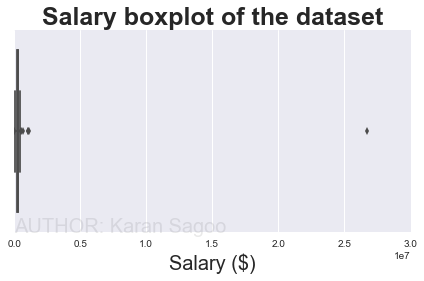

In [814]:
ax = sns.boxplot(x = "salary", data = df)
fillAndSavePlot("Salary boxplot of the dataset","Salary ($)")

## looking at the shape it seems that the outlier is the sum of all values in salary column

#### We notice that there is an outlier. Investigating it further.

In [815]:
df[df.salary > 2.5 *1e7]

,poi,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,from_messages,other,from_this_person_to_poi,salary,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person,name
104,0.0,NaN,32083396.0,309886585.0,311764000.0,97343619.0,130322299.0,NaN,-7576788.0,434509511.0,...,NaN,42667589.0,NaN,26704229.0,1398517.0,-27992891.0,48521928.0,NaN,NaN,TOTAL


In [816]:
### We notice that outlier is named as "TOTAL". The data has a "name" == "TOTAL" which has total all the payments. Removing the Outlier

In [817]:
df.drop(104, axis = 0, inplace = True)

In [818]:
df.reset_index(drop=True,inplace = True);

In [819]:
### Checking if index is correct at index 104
df.loc[104];

In [820]:
# It is correct. Plotting box plot of salary again

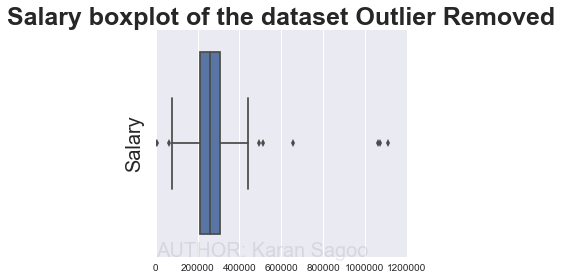

In [821]:
sns.boxplot(x = df["salary"])
plt.tight_layout()
fillAndSavePlot("Salary boxplot of the dataset Outlier Removed", "","Salary")

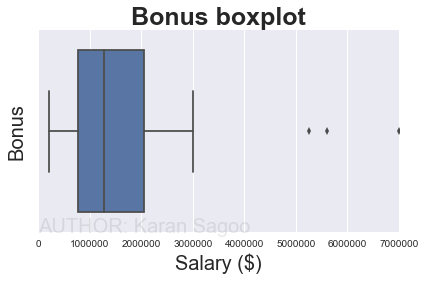

In [822]:
p =sns.boxplot("bonus", data = df[df.poi == 1])
plt.tight_layout()
fillAndSavePlot("Bonus boxplot", "Salary ($)","Bonus")

,salary,bonus
poi,,
0.0,262151.506494,9.868249e+05
1.0,383444.882353,2.075000e+06


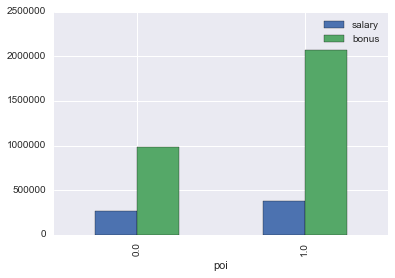

In [823]:
grouped = df.groupby(["poi"])["salary", "bonus"].mean()
display (grouped.head())
grouped.plot(kind = "bar")

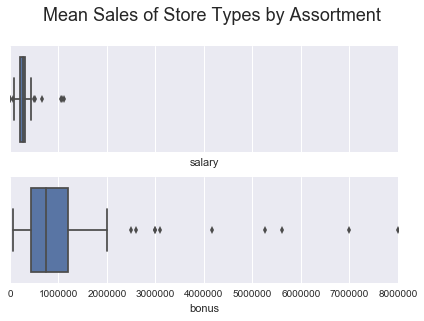

In [824]:
_, ax = plt.subplots(2, sharex = True)
sns.boxplot(x = df["salary"],ax=ax[0])
sns.boxplot(x = df["bonus"],ax=ax[1])
plt.tight_layout()
plt.suptitle('Mean Sales of Store Types by Assortment', fontsize = 18, y =1.1)

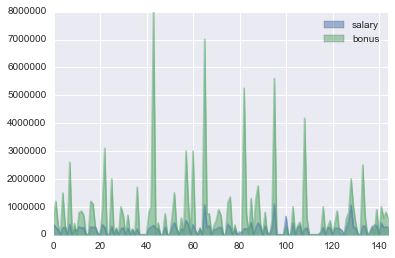

In [825]:
df[['salary','bonus']].plot.area(stacked = False)

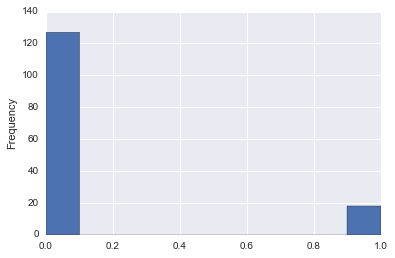

In [826]:
p = df['poi'].plot(kind = 'hist')

## Taking care of NaN Values

In [827]:
df1 = df.copy()
df1.replace(to_replace ="NaN", value = 8888888,inplace = True)
nanCount = []
cols = list(df1.columns)
for i in range(145):
    count = 0
    for col in range (22):
        # print i,col , df.loc[i][col], type(df.loc[i][col])
        if (df1.loc[i][col] == 8888888):
            count +=1
    nanCount.append(count)

In [828]:
print nanCount

[7, 9, 10, 11, 4, 12, 9, 5, 9, 3, 8, 10, 5, 7, 9, 16, 5, 4, 6, 11, 15, 5, 6, 16, 14, 5, 17, 5, 16, 5, 4, 18, 7, 10, 10, 16, 6, 17, 12, 10, 11, 11, 7, 5, 13, 7, 17, 12, 11, 5, 15, 6, 6, 5, 15, 5, 12, 5, 5, 12, 5, 12, 18, 9, 16, 2, 10, 4, 11, 12, 10, 5, 9, 17, 16, 2, 5, 17, 5, 11, 8, 13, 4, 5, 5, 10, 10, 5, 4, 5, 20, 5, 11, 16, 12, 5, 16, 11, 14, 15, 7, 18, 15, 5, 11, 4, 11, 16, 2, 4, 13, 16, 12, 15, 11, 8, 10, 8, 6, 5, 16, 5, 5, 9, 12, 13, 5, 3, 2, 11, 9, 12, 16, 5, 5, 17, 6, 5, 6, 4, 18, 5, 7, 5, 5]


In [829]:
df1["nan_count"] = nanCount

In [830]:
df1.replace(to_replace =8888888, value = np.nan,inplace = True)

In [831]:
df1[(df1["nan_count"] > 18) & (df.poi == 0)]

,poi,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,other,from_this_person_to_poi,salary,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person,name,nan_count
90,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOCKHART EUGENE E,20


In [832]:
df[df.name == "LOCKHART EUGENE E"].isnull().count()

poi                          1
to_messages                  1
deferral_payments            1
total_payments               1
exercised_stock_options      1
bonus                        1
restricted_stock             1
shared_receipt_with_poi      1
restricted_stock_deferred    1
total_stock_value            1
expenses                     1
loan_advances                1
from_messages                1
other                        1
from_this_person_to_poi      1
salary                       1
director_fees                1
deferred_income              1
long_term_incentive          1
email_address                1
from_poi_to_this_person      1
name                         1
dtype: int64

In [833]:
# We notice that item at index has all NAN, so removing it as it can a be an outlier

In [834]:
df = df1.copy()

In [835]:
df.loc[90];

### Replacing NaN values


In [836]:
## Further Exploration of the dataset

In [837]:
df = df.fillna(0)
df['combined'] = (
    df['bonus'] + 
    df['director_fees'] +
    df['deferral_payments'] +
    df['deferred_income'] +
    df['loan_advances'] +
    df['long_term_incentive'] +
    df['expenses'] +
    df['other'] +
    df['salary']
)
df["isTotal_paymentsCorrect"] = (df['combined'] == df['total_payments'])

In [838]:
df[df["isTotal_paymentsCorrect"] == False]

,poi,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,salary,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person,name,nan_count,combined,isTotal_paymentsCorrect
24,0.0,0.0,-102500.0,102500.0,3285.0,0.0,0.0,0.0,44093.0,-44093.0,...,0.0,3285.0,0.0,0.0,0,0.0,BELFER ROBERT,14,-99215.0,False
117,0.0,523.0,0.0,15456290.0,2604490.0,0.0,-2604490.0,463.0,15456290.0,0.0,...,0.0,137864.0,0.0,0.0,sanjay.bhatnagar@enron.com,0.0,BHATNAGAR SANJAY,8,275728.0,False


In [839]:
df['stocks_combined'] = (
    df['restricted_stock'] +
    df['exercised_stock_options'] +
    df['restricted_stock_deferred']
)

df['isTotalStockCorrect'] = (df['stocks_combined'] == df['total_stock_value'])

In [840]:
df[df["isTotalStockCorrect"] == False]

,poi,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,deferred_income,long_term_incentive,email_address,from_poi_to_this_person,name,nan_count,combined,isTotal_paymentsCorrect,stocks_combined,isTotalStockCorrect
24,0.0,0.0,-102500.0,102500.0,3285.0,0.0,0.0,0.0,44093.0,-44093.0,...,0.0,0.0,0,0.0,BELFER ROBERT,14,-99215.0,False,47378.0,False
117,0.0,523.0,0.0,15456290.0,2604490.0,0.0,-2604490.0,463.0,15456290.0,0.0,...,0.0,0.0,sanjay.bhatnagar@enron.com,0.0,BHATNAGAR SANJAY,8,275728.0,False,15456290.0,False


### Thus we see there are 2 rows with incorrect values. Looking at financial history for "BELFER ROBERT" and "BHATNAGAR SANJAY" We fill our data frame with the required values

In [841]:
stock_features =  ['restricted_stock','exercised_stock_options','restricted_stock_deferred','total_stock_value']
paymnet_income_features = ['bonus', 'director_fees','deferral_payments','deferred_income','loan_advances','long_term_incentive','expenses','other''salary']

In [842]:
df.set_value(24,'deferred_income', -102500);
df.set_value(24,'deferral_payments', 0);
df.set_value(24,'expenses', 3285);
df.set_value(24,'director_fees', 102500);
df.set_value(24,'total_payments', 3285);
df.set_value(24,'exercised_stock_options', 0);
df.set_value(24,'restricted_stock', 44093);
df.set_value(24,'restricted_stock_deferred', -44093);
df.set_value(24,'total_stock_value', 0);

df.set_value(117,'other', 0);
df.set_value(117,'expenses', 137864);
df.set_value(117,'director_fees', 0);
df.set_value(117,'total_payments', 137864);
df.set_value(117,'exercised_stock_options', 15456290);
df.set_value(117,'restricted_stock', 2604490);
df.set_value(117,'restricted_stock_deferred', -2604490);
df.set_value(117,'total_stock_value', 15456290);

In [843]:
### Checking if our calcuations are coorect

In [844]:
df['combinedUpdated1'] = (
    df['bonus'] + 
    df['director_fees'] +
    df['deferral_payments'] +
    df['deferred_income'] +
    df['loan_advances'] +
    df['long_term_incentive'] +
    df['expenses'] +
    df['other'] +
    df['salary']
)

df['stocks_combinedUpdated1'] = (
    df['restricted_stock'] +
    df['exercised_stock_options'] +
    df['restricted_stock_deferred']
)

df['isTotalStockCorrect_updated']  = (df['stocks_combinedUpdated1'] == df['total_stock_value'])


df["isTotal_paymentsCorrect_updated"] = (df['combinedUpdated1'] == df['total_payments'])

In [845]:
df[df['isTotal_paymentsCorrect_updated'] == False].count()

poi                                0
to_messages                        0
deferral_payments                  0
total_payments                     0
exercised_stock_options            0
bonus                              0
restricted_stock                   0
shared_receipt_with_poi            0
restricted_stock_deferred          0
total_stock_value                  0
expenses                           0
loan_advances                      0
from_messages                      0
other                              0
from_this_person_to_poi            0
salary                             0
director_fees                      0
deferred_income                    0
long_term_incentive                0
email_address                      0
from_poi_to_this_person            0
name                               0
nan_count                          0
combined                           0
isTotal_paymentsCorrect            0
stocks_combined                    0
isTotalStockCorrect                0
c

In [846]:
df[df['isTotalStockCorrect_updated'] == False].count()

poi                                0
to_messages                        0
deferral_payments                  0
total_payments                     0
exercised_stock_options            0
bonus                              0
restricted_stock                   0
shared_receipt_with_poi            0
restricted_stock_deferred          0
total_stock_value                  0
expenses                           0
loan_advances                      0
from_messages                      0
other                              0
from_this_person_to_poi            0
salary                             0
director_fees                      0
deferred_income                    0
long_term_incentive                0
email_address                      0
from_poi_to_this_person            0
name                               0
nan_count                          0
combined                           0
isTotal_paymentsCorrect            0
stocks_combined                    0
isTotalStockCorrect                0
c

In [847]:
### Thus we fixed the incorrect values

In [848]:
### Feature Engineering

In [849]:
df["to_messages"].replace(to_replace = 0, value = np.nan,inplace = True)
df["from_messages"].replace(to_replace = 0, value = np.nan,inplace = True)

In [850]:
df["ratio_messgs_to_POI"] = df["from_this_person_to_poi"]/df["to_messages"]
df["ratio_messgs_from_POI"] = df["from_poi_to_this_person"]/df["from_messages"]

In [851]:
df.replace(to_replace = np.nan, value = 0, inplace = True)

In [858]:
df.reset_index(drop=True,inplace =True)

In [861]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
poi                                145 non-null float64
to_messages                        145 non-null float64
deferral_payments                  145 non-null float64
total_payments                     145 non-null float64
exercised_stock_options            145 non-null float64
bonus                              145 non-null float64
restricted_stock                   145 non-null float64
shared_receipt_with_poi            145 non-null float64
restricted_stock_deferred          145 non-null float64
total_stock_value                  145 non-null float64
expenses                           145 non-null float64
loan_advances                      145 non-null float64
from_messages                      145 non-null float64
other                              145 non-null float64
from_this_person_to_poi            145 non-null float64
salary                             145 non-null float64

### Finally lets pickle our saved cleaned data frame

In [864]:
# df.drop(['nan_count','combined','isTotalandCombined_equal','stocks_combined','isTotalStockCorrect', 'combinedUpdated',\
# 'stocks_combinedUpdated','combinedUpdated1', 'stocks_combinedUpdated1','isTotalStockCorrect_updated','isTotal_paymentsCorrect_updated'],axis = 1,inplace = True)

extra_columnsToRemove = ['nan_count', 'combined',
       'isTotal_paymentsCorrect', 'stocks_combined', 'isTotalStockCorrect',
       'combinedUpdated1', 'stocks_combinedUpdated1',
       'isTotalStockCorrect_updated', 'isTotal_paymentsCorrect_updated', 'ratio_messgs_to_POI', 'ratio_messgs_from_POI']
df.drop(extra_columnsToRemove,axis=1,inplace = True)

In [866]:
df.columns

Index([u'poi', u'to_messages', u'deferral_payments', u'total_payments',
       u'exercised_stock_options', u'bonus', u'restricted_stock',
       u'shared_receipt_with_poi', u'restricted_stock_deferred',
       u'total_stock_value', u'expenses', u'loan_advances', u'from_messages',
       u'other', u'from_this_person_to_poi', u'salary', u'director_fees',
       u'deferred_income', u'long_term_incentive', u'email_address',
       u'from_poi_to_this_person', u'name'],
      dtype='object')

In [ ]:
### Finally picking our cleaned dataset for use of classyfying

In [869]:
df.to_pickle("/Users/karansagoo/PycharmProjects/Resume/Enron_Report/data/enron_cleaned_dataframe.pkl")